<a href="https://colab.research.google.com/github/geoffrey546/stock_forecasting/blob/main/final_trade_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install alpha_vantage

     |████████████████████████████████| 1.3MB 6.7MB/s 
     |████████████████████████████████| 143kB 25.0MB/s 
     |████████████████████████████████| 296kB 18.8MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3163 sha256=95e15d5aae10e938dbd4edb79b851c053e10f43092faaff66d1a21f6486ce3b4
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl


In [3]:
from alpha_vantage.timeseries import TimeSeries #we get the data from alpha_vantage

In [4]:
import time

In [5]:
api_key = '89OOFNM3BL4MEGMV'
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_daily(symbol = 'MSFT', outputsize = 'full')

In [7]:
#planning to include both yesterdays and day before yesterdays
open_val = data['1. open'].values
close_val = data['4. close'].values 
high_val = data['2. high'].values 
low_val = data['3. low'].values 

In [45]:
yesterday_close = np.delete(close_val, [0,5241])

In [10]:
yesterday_open = np.delete(open_val, [0,5241])

In [11]:
yesterday_high = np.delete(high_val, [0,5241])

In [12]:
yesterday_low = np.delete(low_val, [0,5241])

In [13]:
needed_open = np.delete(open_val, [5241,5240])

In [15]:
needed_close = np.delete(close_val, [5241,5240])

In [16]:
needed_high = np.delete(high_val, [5241,5240])

In [17]:
needed_low = np.delete(low_val, [5241,5240])

In [20]:
previous_low = np.delete(low_val,[0,1])

In [21]:
previous_high = np.delete(high_val,[0,1])

In [22]:
previous_close = np.delete(close_val,[0,1])

In [23]:
previous_open = np.delete(open_val,[0,1])

In [25]:
data_values = pd.DataFrame({'open': needed_open, 'yesterday_open': yesterday_open,'previous_open': previous_open,
                            'close': needed_close, 'yesterday_close': yesterday_close, 'previous_close': previous_close,
                            'high': needed_high, 'yesterday_high': yesterday_high, 'previous_high': previous_high,
                            'low': needed_low, 'yesterday_low': yesterday_low, 'previous_low': previous_low})


In [26]:
time_series_index = np.delete(data.index, [5241,5240])

In [27]:
data_values.index = time_series_index

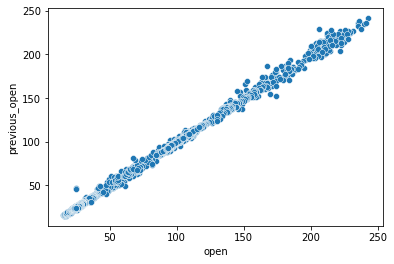

In [29]:
sns.scatterplot(x='open',y='previous_open',data=data_values)

In [30]:
data_values.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5348 entries, 2021-02-04 to 1999-11-01
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   open             5348 non-null   float64
 1   yesterday_open   5348 non-null   float64
 2   previous_open    5348 non-null   float64
 3   close            5348 non-null   float64
 4   yesterday_close  5348 non-null   float64
 5   previous_close   5348 non-null   float64
 6   high             5348 non-null   float64
 7   yesterday_high   5348 non-null   float64
 8   previous_high    5348 non-null   float64
 9   low              5348 non-null   float64
 10  yesterday_low    5348 non-null   float64
 11  previous_low     5348 non-null   float64
dtypes: float64(12)
memory usage: 543.2 KB


In [31]:
data_values.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
open,5348.0,55.283358,43.747253,15.20,27.08,35.555,64.8800,242.66
yesterday_open,5348.0,55.254415,43.674405,15.20,27.08,35.555,64.8800,241.30
previous_open,5348.0,55.226120,43.603932,15.20,27.08,35.555,64.8800,241.30
close,5348.0,55.296516,43.765433,15.15,27.12,35.520,64.9325,243.00
yesterday_close,5348.0,55.267345,43.692890,15.15,27.12,35.520,64.9325,243.00
previous_close,5348.0,55.238057,43.619462,15.15,27.12,35.520,64.9325,239.65
high,5348.0,55.911250,44.255301,15.62,27.32,35.775,65.5525,245.09
yesterday_high,5348.0,55.882223,44.183260,15.62,27.32,35.775,65.5525,245.09
previous_high,5348.0,55.852943,44.109673,15.62,27.32,35.775,65.5525,242.64
low,5348.0,54.658338,43.221147,14.87,26.91,35.035,64.2700,240.37


In [32]:
data_values.corr()['close'].sort_values(ascending = False)

close              1.000000
low                0.999831
high               0.999817
open               0.999673
yesterday_close    0.999446
yesterday_low      0.999389
yesterday_high     0.999357
yesterday_open     0.999239
previous_close     0.999118
previous_low       0.999049
previous_high      0.998980
previous_open      0.998886
Name: close, dtype: float64

In [33]:
x = data_values[['low','open','yesterday_close','yesterday_low','yesterday_high','yesterday_open','previous_close','previous_low','previous_high','previous_open']].values
y = data_values['close'].values

In [34]:
y

array([242.01, 243.  , 239.51, ...,  92.  ,  92.56,  92.37])

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [38]:
model = Sequential()


model.add(Dense(40,activation='relu'))

model.add(Dense(20,activation='relu'))

model.add(Dense(10,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [43]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode = 'min',  verbose=1, patience=25)

In [44]:
model.fit(x=x_train, 
          y=y_train, 
          epochs=400,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/400
117/117 [==============================] - 0s 2ms/step - loss: 0.7268 - val_loss: 0.6024
Epoch 2/400
117/117 [==============================] - 0s 2ms/step - loss: 0.6929 - val_loss: 0.6146
Epoch 3/400
117/117 [==============================] - 0s 2ms/step - loss: 0.7111 - val_loss: 0.6175
Epoch 4/400
117/117 [==============================] - 0s 2ms/step - loss: 0.8094 - val_loss: 0.6005
Epoch 5/400
117/117 [==============================] - 0s 2ms/step - loss: 0.7969 - val_loss: 0.6138
Epoch 6/400
117/117 [==============================] - 0s 2ms/step - loss: 0.7230 - val_loss: 0.6153
Epoch 7/400
117/117 [==============================] - 0s 2ms/step - loss: 0.8528 - val_loss: 0.7500
Epoch 8/400
117/117 [==============================] - 0s 2ms/step - loss: 0.7394 - val_loss: 0.6860
Epoch 9/400
117/117 [==============================] - 0s 2ms/step - loss: 0.7928 - val_loss: 0.6182
Epoch 10/400
117/117 [==============================] - 0s 2ms/step - loss: 0.6964 - val_lo

In [41]:
losses = pd.DataFrame(model.history.history)

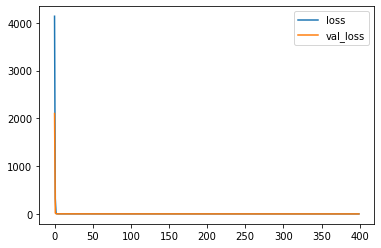

In [42]:
losses.plot()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [ ]:
predictions = model.predict(x_test)

In [ ]:
mean_absolute_error(y_test,predictions)

0.6188966796544975

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))

0.924720172101547

In [ ]:
explained_variance_score(y_test,predictions)

0.9996346649711916

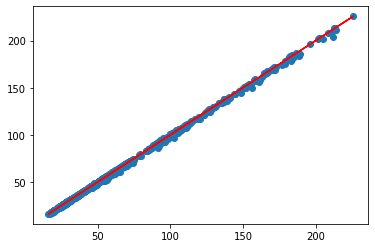

In [ ]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [46]:
final = data_values.drop('close',axis=1)
final = final.drop('high',axis=1)

In [47]:
predict = final.iloc[1030]
print(predict)

open               62.96
yesterday_open     62.86
previous_open      63.40
yesterday_close    62.90
previous_close     62.99
yesterday_high     63.20
previous_high      63.40
low                62.03
yesterday_low      62.73
previous_low       62.83
Name: 2016-12-30 00:00:00, dtype: float64


In [ ]:
predict = scaler.transform(predict.values.reshape(-1, 10))

In [ ]:
predict

array([[0.19427519, 0.1944314 , 0.1956676 , 0.20202415, 0.1908783 ,
        0.20029852, 0.20456311, 0.20173836, 0.19610597, 0.20381883]])

In [ ]:
model.predict(predict)

array([[55.828243]], dtype=float32)

In [ ]:
needed_close[1030]

56.21

In [ ]:
needed_open[1030]

56.0